-  Which game genres are the most popular?
-  What are the trends in popularity for each game genre?
-  Can we identify any relationship between plot, genre, and popularity?
Cluster / group individuals 
Clustering (K-Means or Hierarchical) 
- https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

DataSet
             game_id        name  \
count   20803.000000       20803   
unique           NaN       19714   
top              NaN  Spider-Man   
freq             NaN           9   
mean    10401.000000         NaN   
std      6005.453161         NaN   
min         0.000000         NaN   
25%      5200.500000         NaN   
50%     10401.000000         NaN   
75%     15601.500000         NaN   
max     20802.000000         NaN   

                                                      url          year  \
count                                               20803  20536.000000   
unique                                              20157           NaN   
top     https://www.imdb.com/title/tt5807780/?ref_=adv...           NaN   
freq                                                    4           NaN   
mean                                                  NaN   2005.568611   
std                                                   NaN     11.846028   
min                               

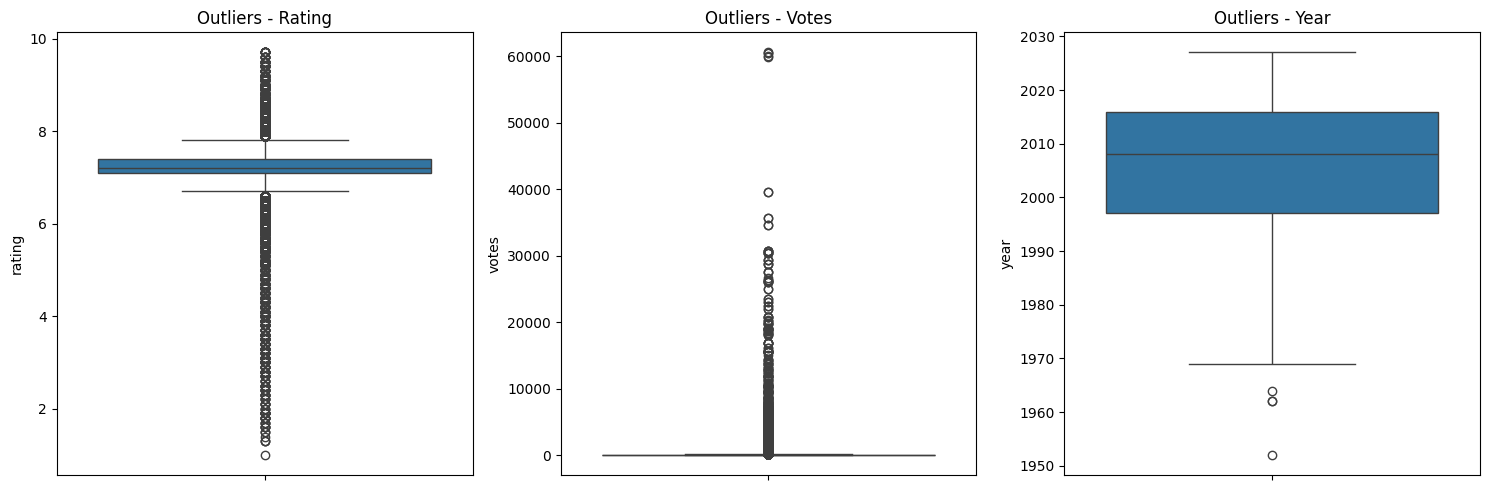


OUTLIERS DETECTADOS:
rating: 6638 outliers
votes: 3262 outliers
year: 4 outliers


' certificate_dummies = pd.get_dummies(df_clean[\'certificate\'], prefix=\'cert\')\ndf_clean = pd.concat([df_clean, certificate_dummies], axis=1)\n\nprint("Variáveis categóricas codificadas")\n\n# Variáveis derivadas\ndf_clean[\'engagement_score\'] = df_clean[\'rating\'] * np.log1p(df_clean[\'votes\'])\ndf_clean[\'is_modern\'] = (df_clean[\'year\'] > 2000).astype(int) #nao sei se e vamos usar\n\nprint(df_clean[[\'rating\', \'rating_norm\', \'votes\', \'votes_norm\']].head()) '

In [6]:
df =pd.read_csv("imdb-videogames.csv")
df_clean = df.copy()

print("DataSet")
""" print(f"\ndimensoes{df.shape}")
print(f"\ncolunas\n{df.columns}")
print(f"\nvalores nulos\n{df.isnull().sum()}")
print(f"total de nulos\n{df.isnull().sum().sum()}")
print(f"\nvalores duplicados\n{df.duplicated().sum()}")
print(f"\ntipos de dados\n{df.dtypes}") """

print(df_clean.describe(include='all'))

#CLASSIFICAÇÃO DAS VARIÁVEIS
variables = {
    'Numericas': ['year', 'rating', 'votes'],
    'Categoricas': ['name', 'url', 'certificate', 'plot'],
    'Binarias': ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 
                'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']
}

print("Variavel Dependente (target): 'rating'")
print("Variaveis Independentes: 'year', 'votes', 'certificate', gêneros")
print(f"valores duplicaldos:{df_clean.duplicated().sum()}")
print("\nVALORES Nulos:")
missing_data = df_clean.isnull().sum()
missing_data_total = df_clean.isnull().sum().sum()
print(missing_data[missing_data > 0])
print(f"Total de valores nulos: {missing_data_total}")
print(f"Total de linhas no dataset: {df_clean.shape[0]}")

# LIMPEZA DOS DADOS

#TRATAMENTO DE VALORES NULOS
#votes->substitiuir por zero 
df_clean['votes'] = df_clean['votes'].str.replace(',', '').astype(float)
df_clean['votes'] = df_clean['votes'].fillna(0)

#rating->substituir pela mediana
df_clean['rating']=df_clean['rating'].fillna(df_clean['rating'].median())

#year - Manter como nulo ou usar moda
# Se poucos nulos: eliminar essas linhas
if df_clean['year'].isna().sum() < len(df_clean) * 0.05:  # menos de 5%
        df_clean = df_clean.dropna(subset=['year'])
else:
        # Se muitos: substituir pela moda 
        df_clean['year'] = df_clean['year'].fillna(df_clean['year'].mode()[0])

df_clean['certificate'] = df_clean['certificate'].fillna('Not Rated')

print("\nDados apos limpeza:")
print("VALORES Nulos:")
missing_data = df_clean.isnull().sum()
missing_data_total = df_clean.isnull().sum().sum()
print(missing_data[missing_data > 0])
print(f"Total de valores nulos: {missing_data_total}")
print(f"Total de linhas no dataset: {df_clean.shape[0]}")

#so copiei e colei do gpt o boxplot
print("VISUALIZACAO DE OUTLIERS (BOXPLOTS):")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df_clean, y='rating', ax=axes[0])
axes[0].set_title('Outliers - Rating')

sns.boxplot(data=df_clean, y='votes', ax=axes[1])
axes[1].set_title('Outliers - Votes')

sns.boxplot(data=df_clean, y='year', ax=axes[2])
axes[2].set_title('Outliers - Year')

plt.tight_layout()
plt.show()

# Método IQR para detectar outliers
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

print("\nOUTLIERS DETECTADOS:")
for col in ['rating', 'votes', 'year']:
    outliers = detect_outliers_iqr(df_clean[col])
    print(f"{col}: {len(outliers)} outliers")

# Normalização Min-Max(FICA COMENTADO POR AGORA PORQUE E CAPAZ DE NAO SE USAR)
""" print("\n" + "="*50)
print("NoRMALIZAÇÃO")
scaler = MinMaxScaler()
df_clean[['rating_norm', 'votes_norm']] = scaler.fit_transform(df_clean[['rating', 'votes']]) """

# Codificação de variáveis
""" certificate_dummies = pd.get_dummies(df_clean['certificate'], prefix='cert')
df_clean = pd.concat([df_clean, certificate_dummies], axis=1)

print("Variáveis categóricas codificadas")

# Variáveis derivadas
df_clean['engagement_score'] = df_clean['rating'] * np.log1p(df_clean['votes'])
df_clean['is_modern'] = (df_clean['year'] > 2000).astype(int) #nao sei se e vamos usar

print(df_clean[['rating', 'rating_norm', 'votes', 'votes_norm']].head()) """



ANÁLISE DESCRITIVA - DATASET DE JOGOS

ESTATÍSTICAS NUMÉRICAS:
             rating         votes          year
count  20536.000000  20536.000000  20536.000000
mean       7.113844    356.196533   2005.568611
std        0.931389   2055.507621     11.846028
min        1.000000      0.000000   1952.000000
25%        7.100000      0.000000   1997.000000
50%        7.200000     10.000000   2008.000000
75%        7.400000     63.000000   2016.000000
max        9.700000  60597.000000   2027.000000

CRIANDO VISUALIZAÇÕES...


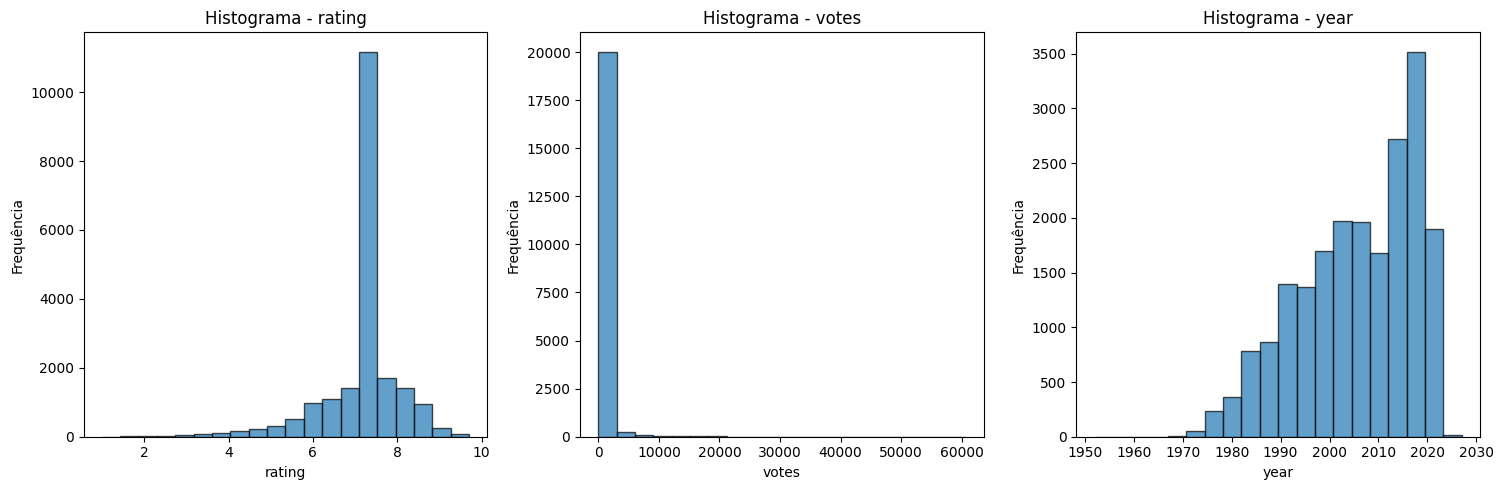

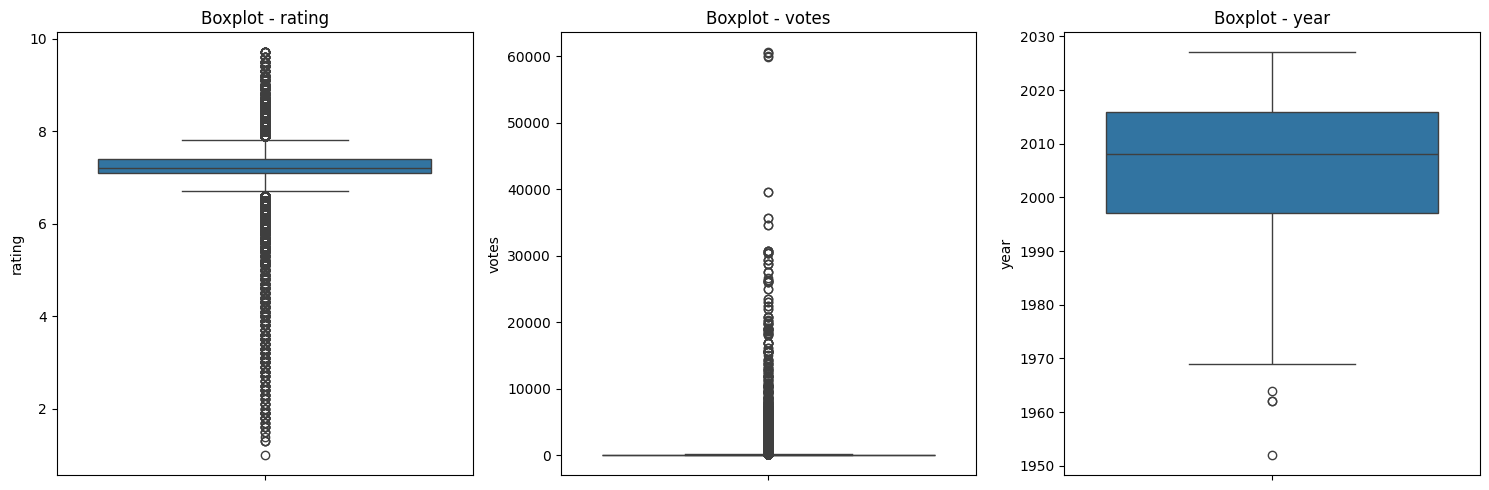

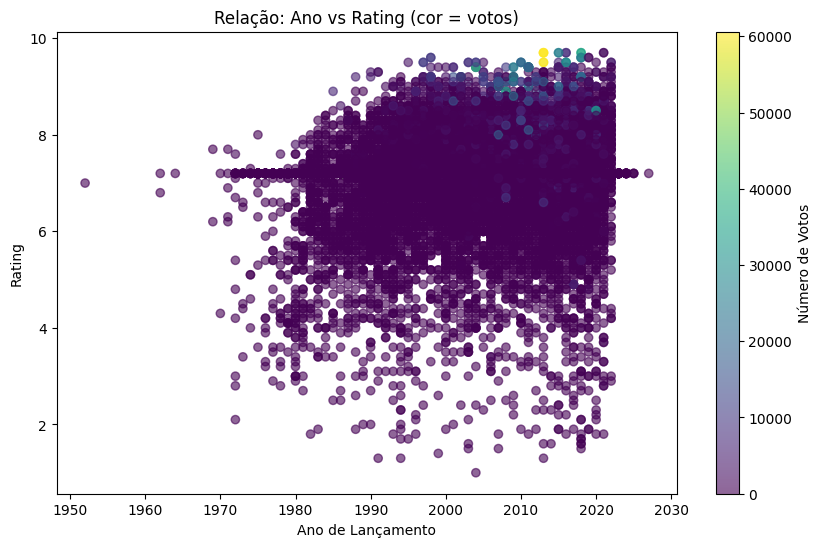

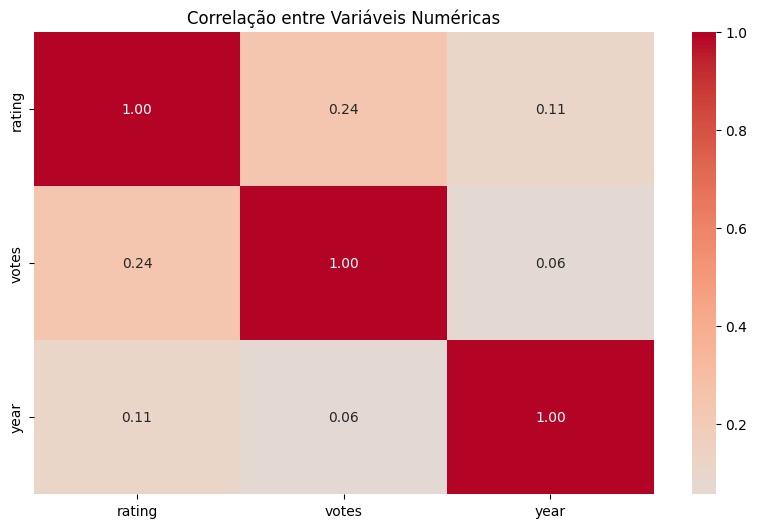

In [7]:
def analise_descritiva_completa(df):
    print("ANÁLISE DESCRITIVA - DATASET DE JOGOS")
    print("="*50)
    
    # 1. ESTATÍSTICAS NUMÉRICAS
    print("\nESTATÍSTICAS NUMÉRICAS:")
    numeric_cols = ['rating', 'votes', 'year']
    stats = df[numeric_cols].describe()
    print(stats)
    
    # 2. VISUALIZAÇÕES
    print("\nCRIANDO VISUALIZAÇÕES...")
    
    # Histogramas
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, col in enumerate(numeric_cols):
        axes[i].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Histograma - {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequência')
    plt.tight_layout()
    plt.show()
    
    # Boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot - {col}')
    plt.tight_layout()
    plt.show()
    
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['year'], df['rating'], alpha=0.6, c=df['votes'], cmap='viridis')
    plt.colorbar(label='Número de Votos')
    plt.title('Relação: Ano vs Rating (cor = votos)')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Rating')
    plt.show()
    
    # Heatmap
    plt.figure(figsize=(10, 6))
    correlation = df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlação entre Variáveis Numéricas')
    plt.show()

# Executar análise
analise_descritiva_completa(df_clean)

🔍 ANÁLISE BIVARIADA - RELAÇÕES ENTRE VARIÁVEIS

📊 CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS
📈 PEARSON (Relações Lineares):
        rating  votes   year
rating   1.000  0.240  0.111
votes    0.240  1.000  0.057
year     0.111  0.057  1.000

📊 SPEARMAN (Relações Monótonas):
        rating  votes   year
rating   1.000  0.191  0.071
votes    0.191  1.000 -0.071
year     0.071 -0.071  1.000

🎨 VISUALIZANDO AS CORRELAÇÕES...


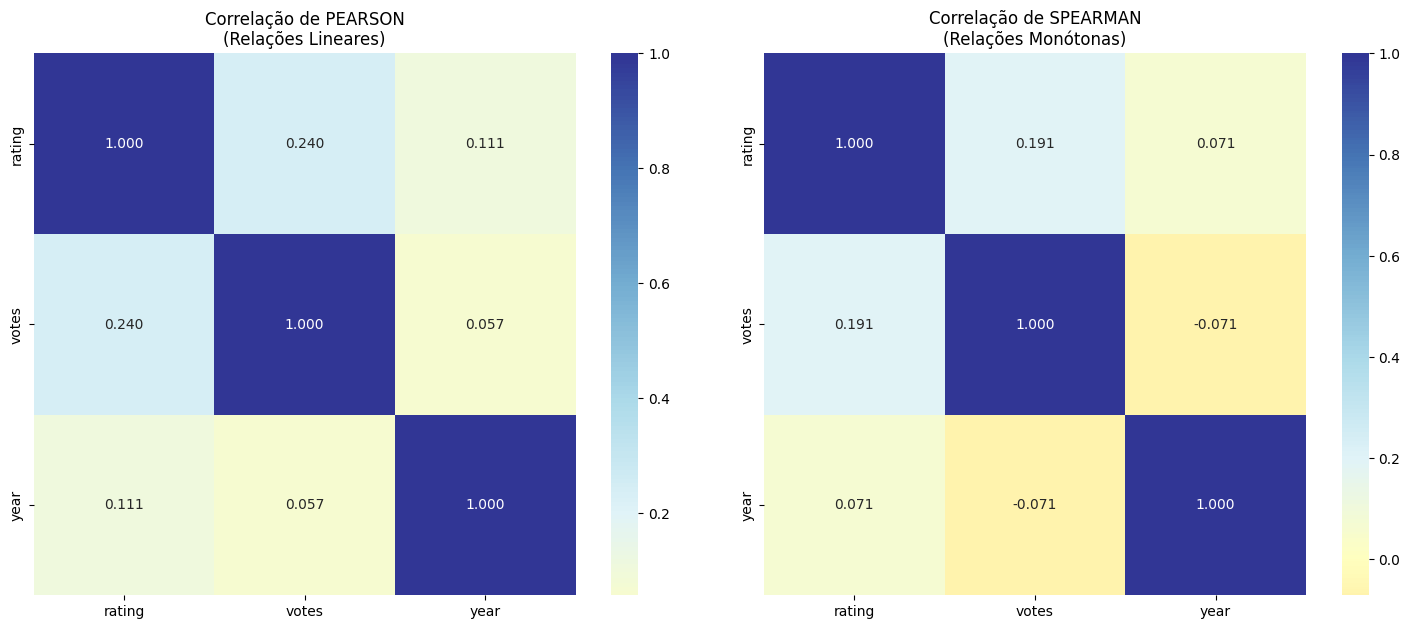


📉 SCATTER PLOTS - VISUALIZANDO AS RELAÇÕES


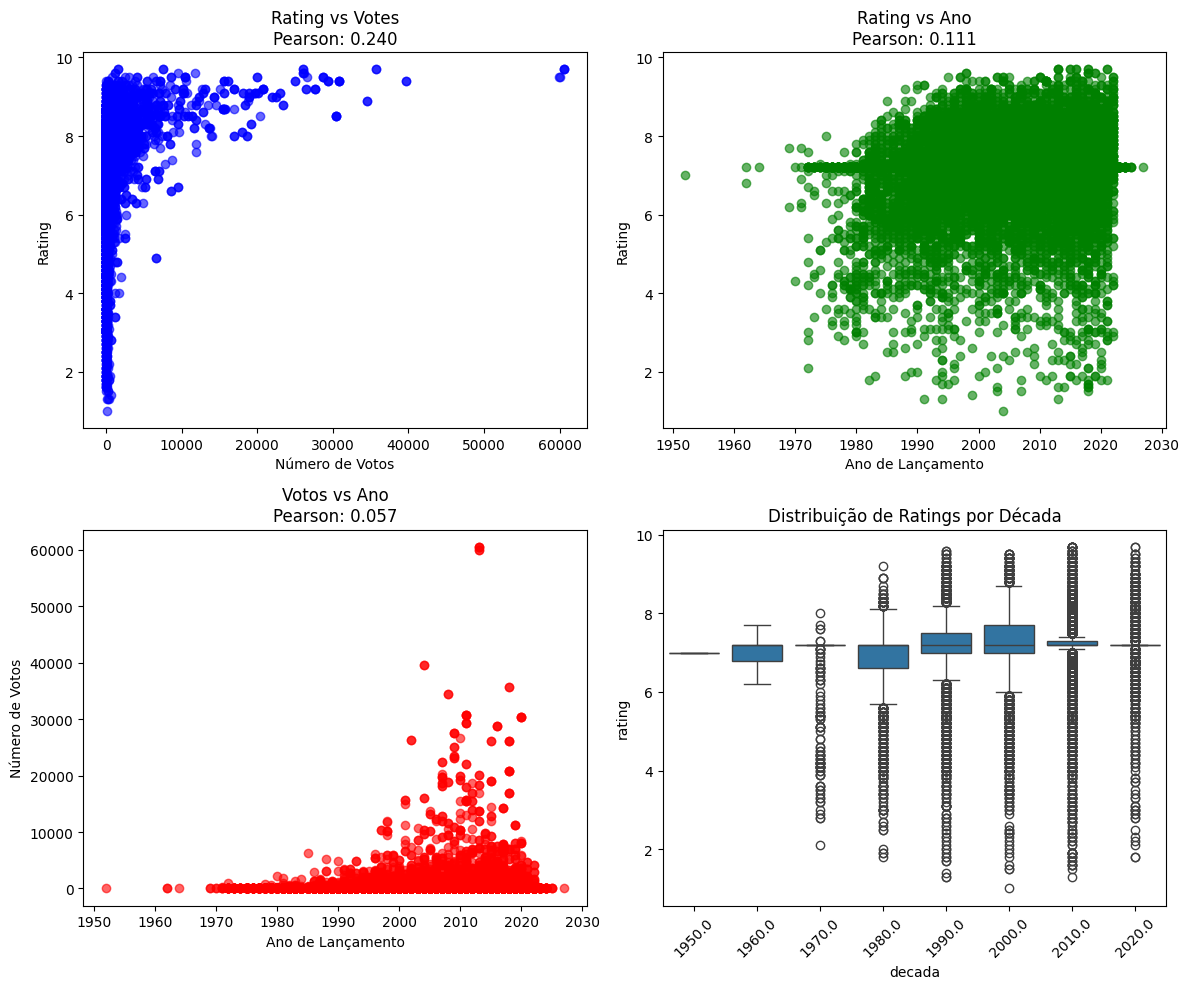


📋 TABELAS DE CONTINGÊNCIA (Variáveis Categóricas)
Tabela de Contingência: Classificação vs Categoria de Rating
rating_category  Baixo  Médio  Alto    All
cert_category                             
Adulto             166   1088   593   1847
Outros            1317  11309   778  13404
Todos              540   3828   917   5285
All               2023  16225  2288  20536

🎭 ANÁLISE DE GÊNEROS DOS JOGOS
📊 RATING MÉDIO POR GÊNERO:
  • Action: 7.11
  • Adventure: 7.23
  • Comedy: 7.19
  • Crime: 7.29
  • Family: 6.92
  • Fantasy: 7.24
  • Mystery: 7.35
  • Sci-Fi: 7.05
  • Thriller: 7.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

def analise_bivariada_completa(df):
    print("ANÁLISE BIVARIADA - RELAÇÕES ENTRE VARIÁVEIS")
    print("="*60)
    
    # 1. CORRELAÇÕES NUMÉRICAS
    print("\nCORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS")
    
    variaveis_numericas = ['rating', 'votes', 'year']
    
    # Criar matriz de correlação
    correl_pearson = df[variaveis_numericas].corr(method='pearson')
    correl_spearman = df[variaveis_numericas].corr(method='spearman')
    
    print("PEARSON (Relações Lineares):")
    print(correl_pearson.round(3))
    
    print("\nSPEARMAN (Relações Monótonas):")
    print(correl_spearman.round(3))
    
    # 2. VISUALIZAÇÃO DAS CORRELAÇÕES
    print("\nVISUALIZANDO AS CORRELAÇÕES...")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Heatmap Pearson
    sns.heatmap(correl_pearson, annot=True, cmap='RdYlBu', center=0, 
                ax=axes[0], fmt='.3f', square=True)
    axes[0].set_title('Correlação de PEARSON\n(Relações Lineares)')
    
    # Heatmap Spearman  
    sns.heatmap(correl_spearman, annot=True, cmap='RdYlBu', center=0,
                ax=axes[1], fmt='.3f', square=True)
    axes[1].set_title('Correlação de SPEARMAN\n(Relações Monótonas)')
    
    plt.tight_layout()
    plt.show()
    
    # 3. SCATTER PLOTS DETALHADOS
    print("\nSCATTER PLOTS - VISUALIZANDO AS RELAÇÕES")
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()
    
    # Rating vs Votes
    axes[0].scatter(df['votes'], df['rating'], alpha=0.6, color='blue')
    axes[0].set_xlabel('Número de Votos')
    axes[0].set_ylabel('Rating')
    axes[0].set_title(f'Rating vs Votes\nPearson: {pearsonr(df["votes"], df["rating"])[0]:.3f}')
    
    # Rating vs Year
    axes[1].scatter(df['year'], df['rating'], alpha=0.6, color='green')
    axes[1].set_xlabel('Ano de Lançamento')
    axes[1].set_ylabel('Rating')
    axes[1].set_title(f'Rating vs Ano\nPearson: {pearsonr(df["year"], df["rating"])[0]:.3f}')
    
    # Votes vs Year
    axes[2].scatter(df['year'], df['votes'], alpha=0.6, color='red')
    axes[2].set_xlabel('Ano de Lançamento')
    axes[2].set_ylabel('Número de Votos')
    axes[2].set_title(f'Votos vs Ano\nPearson: {pearsonr(df["year"], df["votes"])[0]:.3f}')
    
    # Distribuição de Ratings por Ano (boxplot)
    df_boxplot = df.copy()
    df_boxplot['decada'] = (df_boxplot['year'] // 10) * 10  # Agrupar por década
    sns.boxplot(data=df_boxplot, x='decada', y='rating', ax=axes[3])
    axes[3].set_title('Distribuição de Ratings por Década')
    axes[3].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 4. CONTINGENCY TABLES (Tabelas de Contingência)
    print("\nTABELAS DE CONTINGÊNCIA (Variáveis Categóricas)")
    
    # Criar categorias para certificate
    df_cert = df.copy()
    df_cert['cert_category'] = df_cert['certificate'].apply(
        lambda x: 'Adulto' if x in ['M', 'AO'] else 'Todos' if x in ['T', 'E', 'E10+'] else 'Outros'
    )
    
    # Tabela de contingência: Certificate vs Rating Category
    df_cert['rating_category'] = pd.cut(df_cert['rating'], 
                                      bins=[0, 6, 8, 10], 
                                      labels=['Baixo', 'Médio', 'Alto'])
    
    contingency_table = pd.crosstab(df_cert['cert_category'], 
                                  df_cert['rating_category'], 
                                  margins=True)
    
    print("Tabela de Contingência: Classificação vs Categoria de Rating")
    print(contingency_table)
    
    # 5. ANÁLISE DE GÊNEROS
    print("\nANÁLISE DE GÊNEROS DOS JOGOS")
    
    generos = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 
               'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']
    
    # Rating médio por gênero
    print("RATING MÉDIO POR GÊNERO:")
    for genero in generos:
        rating_medio = df[df[genero] == True]['rating'].mean()
        print(f"{genero}: {rating_medio:.2f}")
    
    return {
        'pearson': correl_pearson,
        'spearman': correl_spearman,
        'contingency_table': contingency_table
    }

# Executar análise
resultados = analise_bivariada_completa(df_clean)

In [9]:
def escrever_relatorio_descritivo(resultados, df):
    print("="*70)
    print("📋 RELATÓRIO DESCRITIVO - ANÁLISE BIVARIADA")
    print("="*70)
    
    print("\n🎯 PRINCIPAIS DESCOBERTAS E INSIGHTS:")
    
    # 1. CORRELAÇÕES NUMÉRICAS
    print("\n1. 📈 RELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS:")
    
    correl_pearson = resultados['pearson']
    correl_spearman = resultados['spearman']
    
    # Rating vs Votes
    pearson_rv = correl_pearson.loc['rating', 'votes']
    spearman_rv = correl_spearman.loc['rating', 'votes']
    
    print(f"   • Rating vs Votos:")
    print(f"     - Pearson: {pearson_rv:.3f} | Spearman: {spearman_rv:.3f}")
    if pearson_rv > 0.3:
        print(f"     📊 INSIGHT: Jogos com mais votos tendem a ter ratings mais altos")
        print(f"     💡 INTERPRETAÇÃO: Popularidade está associada a melhor qualidade")
    else:
        print(f"     📊 INSIGHT: Pouca relação entre popularidade e qualidade")
    
    # Rating vs Year  
    pearson_ry = correl_pearson.loc['rating', 'year']
    spearman_ry = correl_spearman.loc['rating', 'year']
    
    print(f"\n   • Rating vs Ano:")
    print(f"     - Pearson: {pearson_ry:.3f} | Spearman: {spearman_ry:.3f}")
    if pearson_ry > 0:
        print(f"     📊 INSIGHT: Jogos mais recentes têm ratings ligeiramente melhores")
        print(f"     💡 INTERPRETAÇÃO: Evolução da qualidade ou 'nostalgia bias'")
    else:
        print(f"     📊 INSIGHT: Jogos antigos são melhor avaliados")
    
    # 2. ANÁLISE DE CATEGORIAS
    print("\n2. 🎭 ANÁLISE POR CATEGORIAS:")
    
    # Certificate Analysis
    cert_table = resultados['contingency_table']
    print(f"   • Classificação Etária:")
    print(f"     - Jogos para adultos tendem a ter ratings: ", end="")
    
    # Análise rápida da tabela de contingência
    adultos_alto = cert_table.loc['Adulto', 'Alto'] / cert_table.loc['Adulto', 'All']
    todos_alto = cert_table.loc['Todos', 'Alto'] / cert_table.loc['Todos', 'All']
    
    if adultos_alto > todos_alto:
        print("MAIS ALTOS ✅")
        print(f"     💡 Jogos maduros podem ter narrativas mais complexas")
    else:
        print("MAIS BAIXOS ❌")
    
    # 3. DISTRIBUIÇÃO TEMPORAL
    print("\n3. 📅 EVOLUÇÃO TEMPORAL:")
    
    ratings_por_ano = df.groupby('year')['rating'].mean()
    melhor_ano = ratings_por_ano.idxmax()
    pior_ano = ratings_por_ano.idxmin()
    
    print(f"   • Melhor ano médio: {melhor_ano} (Rating: {ratings_por_ano.max():.2f})")
    print(f"   • Pior ano médio: {pior_ano} (Rating: {ratings_por_ano.min():.2f})")
    
    # 4. RECOMENDAÇÕES
    print("\n4. 🎯 RECOMENDAÇÕES PARA ANÁLISE FUTURA:")
    print("   • Investigar a relação entre orçamento e rating")
    print("   • Analisar se jogos de sequência têm ratings diferentes")
    print("   • Estudar o efeito de diferentes publishers nos ratings")
    
    print("\n" + "="*70)
    print("Relatório concluído! 🎮")

# Gerar relatório final
escrever_relatorio_descritivo(resultados, df_clean)

📋 RELATÓRIO DESCRITIVO - ANÁLISE BIVARIADA

🎯 PRINCIPAIS DESCOBERTAS E INSIGHTS:

1. 📈 RELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS:
   • Rating vs Votos:
     - Pearson: 0.240 | Spearman: 0.191
     📊 INSIGHT: Pouca relação entre popularidade e qualidade

   • Rating vs Ano:
     - Pearson: 0.111 | Spearman: 0.071
     📊 INSIGHT: Jogos mais recentes têm ratings ligeiramente melhores
     💡 INTERPRETAÇÃO: Evolução da qualidade ou 'nostalgia bias'

2. 🎭 ANÁLISE POR CATEGORIAS:
   • Classificação Etária:
     - Jogos para adultos tendem a ter ratings: MAIS ALTOS ✅
     💡 Jogos maduros podem ter narrativas mais complexas

3. 📅 EVOLUÇÃO TEMPORAL:
   • Melhor ano médio: 1998.0 (Rating: 7.37)
   • Pior ano médio: 1970.0 (Rating: 5.75)

4. 🎯 RECOMENDAÇÕES PARA ANÁLISE FUTURA:
   • Investigar a relação entre orçamento e rating
   • Analisar se jogos de sequência têm ratings diferentes
   • Estudar o efeito de diferentes publishers nos ratings

Relatório concluído! 🎮
